In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = "0010000M.track.eep"

column_names = []
data_lines = []
with open(filename, 'r') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        if line.startswith('#'):
            # Detect column names line by checking if it looks like the big header row
            # A heuristic: line with many columns (split length > e.g. 10) and no '=' sign
            if (len(line.split()) > 10) and ('=' not in line):
                # Remove '#' and split to get column names
                column_names = line[1:].strip().split()
            continue
        data_lines.append(line)

# Parse data rows into floats
data = []
for line in data_lines:
    row = [float(x) for x in line.split()]
    data.append(row)

import numpy as np
import pandas as pd

data_array = np.array(data)
print("Data shape:", data_array.shape)

# Use extracted column names, if they exist and match number of columns
if column_names and len(column_names) == data_array.shape[1]:
    df = pd.DataFrame(data_array, columns=column_names)
else:
    df = pd.DataFrame(data_array)

df.head()

Data shape: (1710, 77)


,star_age,star_mass,star_mdot,he_core_mass,c_core_mass,o_core_mass,log_L,log_L_div_Ledd,log_LH,log_LHe,...,delta_Pg,nu_max,acoustic_cutoff,max_conv_vel_div_csound,max_gradT_div_grada,gradT_excess_alpha,min_Pgas_div_P,max_L_rad_div_Ledd,e_thermal,phase
0,1766.367861,1.0,-3.390086e-11,0.0,0.0,0.0,1.747691,-3.500185,-5.144278,-99.0,...,0.0,16.535817,150.970296,0.405784,3.913401,0.0,0.999022,0.001550,2.044441e+47,-1.0
1,1860.694700,1.0,-3.340649e-11,0.0,0.0,0.0,1.743706,-3.494013,-5.102420,-99.0,...,0.0,16.721337,152.673538,0.405510,3.904250,0.0,0.999022,0.001550,2.055130e+47,-1.0
2,1960.105501,1.0,-3.289825e-11,0.0,0.0,0.0,1.739575,-3.503391,-5.059036,-99.0,...,0.0,16.916070,154.461477,0.405131,3.901031,0.0,0.999022,0.001551,2.066290e+47,-1.0
3,2064.861875,1.0,-3.237756e-11,0.0,0.0,0.0,1.735353,-3.506673,-5.014102,-99.0,...,0.0,17.120175,156.337405,0.404738,3.887611,0.0,0.999022,0.001551,2.077937e+47,-1.0
4,2175.209577,1.0,-3.184658e-11,0.0,0.0,0.0,1.730895,-3.502491,-4.967608,-99.0,...,0.0,17.334688,158.306739,0.404341,3.888253,0.0,0.999022,0.001551,2.090083e+47,-1.0


In [57]:
features = ["star_age", "log_R", "star_mass", "log_center_T", "log_L"]
df[features].to_csv("star_features.csv", index=False)

In [66]:

import numpy as np

features = ["star_age", "log_R", "star_mass", "log_center_T", "log_L"]
log_features = ["log_R", "log_center_T", "log_L"]
def plot_three_phases(df, feature):
    x = df["star_age"]
    y = 10 ** df[feature] if feature in log_features else df[feature]

    # Define boundaries (early, mid, late) as fractions of full range
    total_time = x.max()
    phase_1_mask = x < total_time * 0.01
    phase_2_mask = (x >= total_time * 0.01) & (x <= total_time * 0.97)
    phase_3_mask = x > total_time * 0.97

    fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

    axs[0].plot(x[phase_1_mask], y[phase_1_mask], color='tab:blue')
    axs[0].set_title("Early Phase")
    axs[0].set_xlabel("Star Age (Myr)")
    axs[0].set_ylabel(f"{feature} (scaled)" if feature in log_features else feature)
    axs[0].grid(True)

    axs[1].plot(x[phase_2_mask], y[phase_2_mask], color='tab:green')
    axs[1].set_title("Main Sequence")
    axs[1].set_xlabel("Star Age (Myr)")
    axs[1].grid(True)

    axs[2].plot(x[phase_3_mask], y[phase_3_mask], color='tab:red')
    axs[2].set_title("Late Evolution")
    axs[2].set_xlabel("Star Age (Myr)")
    axs[2].grid(True)

    fig.suptitle(f"{feature} across Stellar Evolution Phases", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust tight_layout for suptitle

    # Save the figure as PNG
    filename = f"{feature}_stellar_evolution.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight', transparent=False)
    print(f"Saved plot to {filename}")

    plt.close(fig)  # Close figure to free memory and avoid display

# Usage: assuming features and df are defined, and log_features list exists
for feat in features[1:]:  # skip "star_age"
    plot_three_phases(df, feat)


Saved plot to log_R_stellar_evolution.png
Saved plot to star_mass_stellar_evolution.png
Saved plot to log_center_T_stellar_evolution.png
Saved plot to log_L_stellar_evolution.png


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt





features = ['star_age', 'star_mass', 'he_core_mass', 'log_L']
target = 'log_Teff'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


R^2 Score: 0.9999773252722253
MSE: 4.2684475780414505e-06


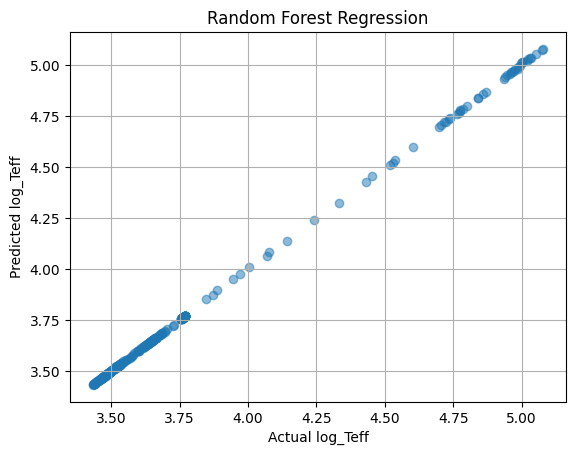

In [50]:
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual log_Teff")
plt.ylabel("Predicted log_Teff")
plt.title("Random Forest Regression")
plt.grid(True)
plt.show()


In [51]:
custom_star = pd.DataFrame([{
    'star_age': 2500,        # Example: in Myr
    'star_mass': 1.0,        # Solar masses
    'he_core_mass': 0.1,     # Solar masses
    'log_L': 0.5             # log solar luminosity
}])

log_teff_pred = model.predict(custom_star)
print("Predicted log_Teff:", log_teff_pred[0])
print("Predicted Teff (K):", 10 ** log_teff_pred[0])


Predicted log_Teff: 3.6225357777243885
Predicted Teff (K): 4193.105385901191


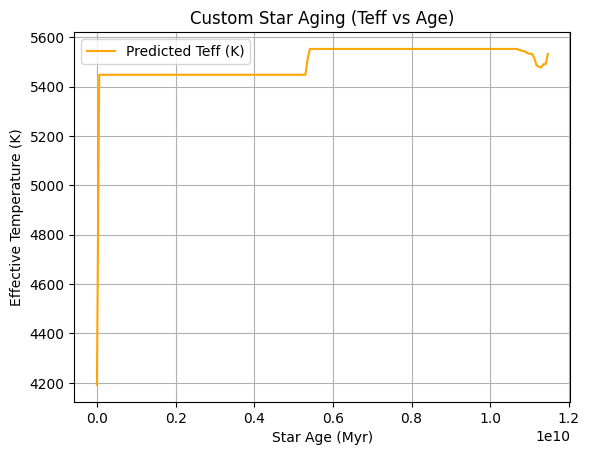

In [52]:
# Simulated ages in Myr
ages = np.linspace(df["star_age"].min(), df["star_age"].max(), 200)

# Create a list of input features at each age
custom_inputs = pd.DataFrame({
    'star_age': ages,
    'star_mass': 1.0,  # constant
    'he_core_mass': 0.1 + 0.00005 * (ages - ages.min()),  # simple linear growth
    'log_L': 0.5  # constant; or could use model to predict log_L first
})

log_teff_preds = model.predict(custom_inputs)
teff_preds = 10 ** log_teff_preds

import matplotlib.pyplot as plt

plt.plot(ages, teff_preds, label="Predicted Teff (K)", color='orange')
plt.xlabel("Star Age (Myr)")
plt.ylabel("Effective Temperature (K)")
plt.title("Custom Star Aging (Teff vs Age)")
plt.grid(True)
plt.legend()
plt.show()


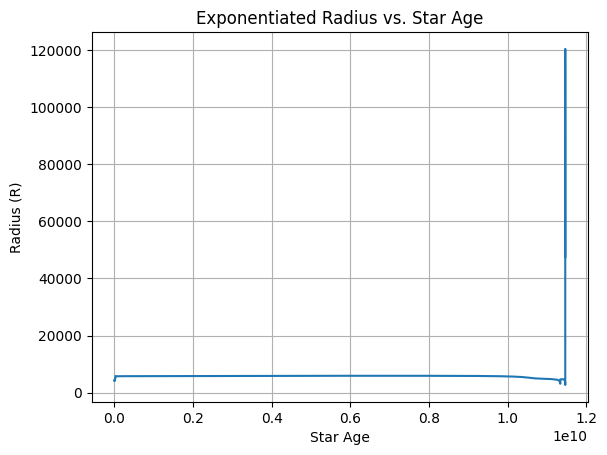

In [54]:
plt.plot(df["star_age"], (10**df["log_Teff"]))
plt.xlabel("Star Age")
plt.ylabel("Radius (R)")
plt.title("Exponentiated Radius vs. Star Age")
plt.grid(True)
plt.show()